In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_csv('day.csv', index_col = 0)

In [3]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [4]:
# Data Cleaning checking the null-value
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [7]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
#Changing the season column back to string 
df['season'] = df['season'].replace(1,'spring')

In [9]:
df['season'].unique()

array(['spring', 2, 3, 4], dtype=object)

In [10]:
df.loc[(df['season']==2),'season']= 'summer'

In [11]:
df.loc[(df['season']==3),'season']= 'fall'

In [12]:
df.loc[(df['season']==4),'season']= 'winter'

In [13]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [14]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [16]:
def object_map(x):
    return x.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

In [17]:
df[['mnth']] = df[['mnth']].apply(object_map)

In [18]:
df['mnth'].value_counts()

aug    62
may    62
mar    62
oct    62
dec    62
jan    62
jul    62
jun    60
nov    60
apr    60
sep    60
feb    56
Name: mnth, dtype: int64

In [19]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [20]:
df['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [21]:
df['weekday'].unique() 

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [22]:
def str_map(x):
    return x.map({1:'wen',2:'thu',3:'fri',4:'sat',5:'sun',6:'mon',0:'tue'})

In [23]:
df[['weekday']]= df[['weekday']].apply(str_map)

In [24]:
df['weekday'].value_counts()

mon    105
tue    105
wen    105
thu    104
sun    104
sat    104
fri    103
Name: weekday, dtype: int64

In [25]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [26]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [27]:
df.loc[(df['weathersit']==1),'weathersit']='A'
df.loc[(df['weathersit']==2),'weathersit']='B' 
df.loc[(df['weathersit']==3),'weathersit']='C' 
df.loc[(df['weathersit']==4),'weathersit']='D' 

In [28]:
df['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [29]:
#checking the columns are normally distributed
df['temp']

instant
1      14.110847
2      14.902598
3       8.050924
4       8.200000
5       9.305237
         ...    
726    10.420847
727    10.386653
728    10.386653
729    10.489153
730     8.849153
Name: temp, Length: 730, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

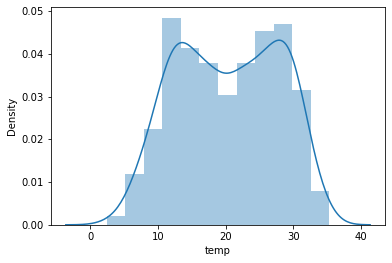

In [30]:
sns.distplot(df['temp'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='atemp', ylabel='Density'>

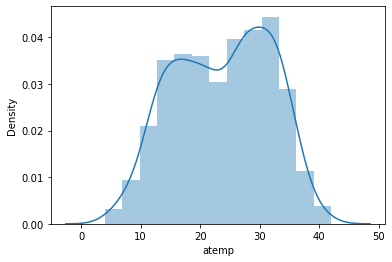

In [31]:
sns.distplot(df['atemp'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum', ylabel='Density'>

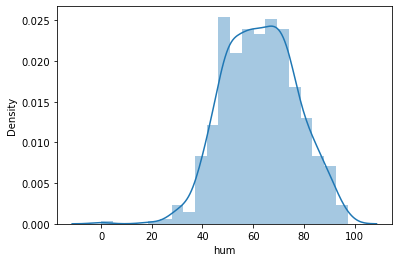

In [32]:
sns.distplot(df['hum'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

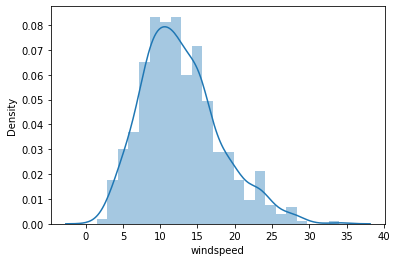

In [33]:
sns.distplot(df['windspeed'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

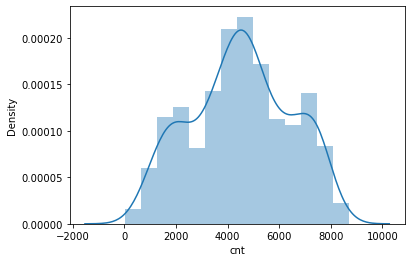

In [34]:
sns.distplot(df['cnt'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


In [36]:
#converting dteday to datetime
df['dteday']= pd.to_datetime(df['dteday'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

In [38]:
#selecting categorical variable
df_categorical = df.select_dtypes('object')

In [39]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

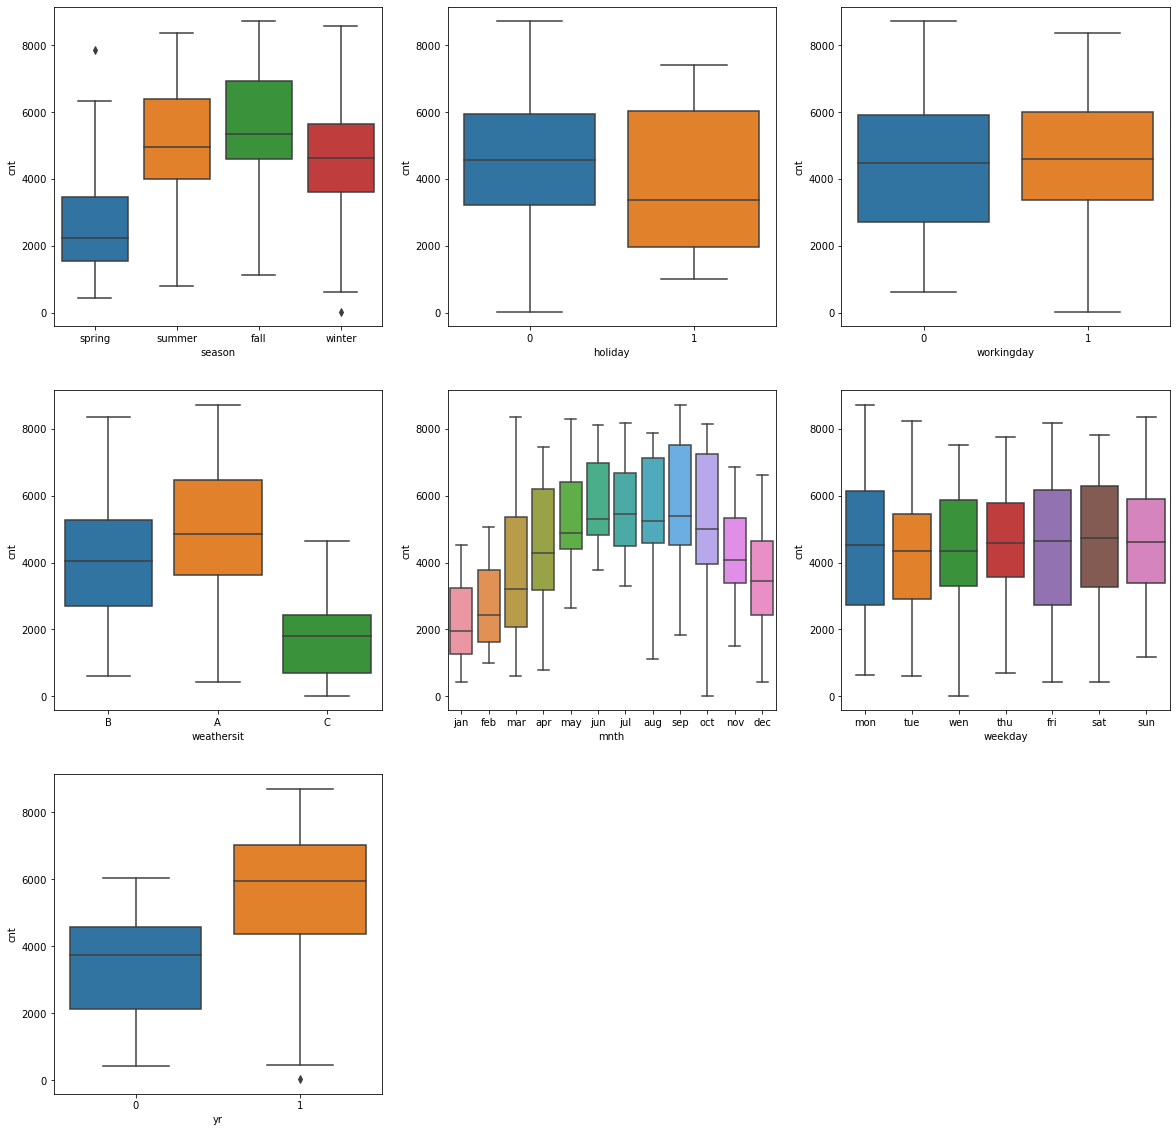

In [41]:
#visualizing data using seaborn to understand the relation between the target varibale 'cnt', and other independent categorical variable
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x=df['season'], y =df['cnt'])

plt.subplot(3,3,2)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=df)

plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=df)

plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=df)

plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=df)

plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt', data=df)

plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 111.2+

In [43]:
df_numeric = df.select_dtypes(include = ['float64','int64'])

In [44]:
df_numeric.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [45]:
df_numeric = df_numeric.drop(['yr', 'holiday', 'workingday'], axis = 1)

In [46]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 65.6 KB


In [47]:
df_numeric

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985
2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,10.386653,12.12000,75.2917,8.333661,159,1182,1341


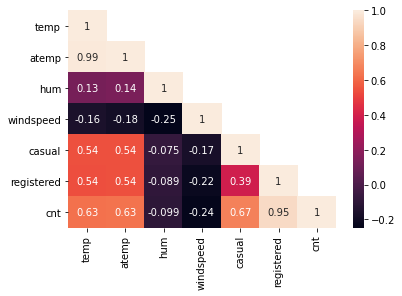

In [48]:
#heatmap customization
mask = np.array(df_numeric.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_numeric.corr(), mask = mask, annot = True)
plt.show()

In [49]:
#removing columns that are highly correlated
df.drop(['atemp'],axis = 1,inplace = True)

In [50]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 65.6 KB


In [51]:
df_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,spring,jan,mon,B
2,spring,jan,tue,B
3,spring,jan,wen,A
4,spring,jan,thu,A
5,spring,jan,fri,A
...,...,...,...,...
726,spring,dec,sat,B
727,spring,dec,sun,B
728,spring,dec,mon,B


In [52]:
df_dummies = pd.get_dummies(df_categorical,drop_first = True)

In [53]:
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wen,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#droping the columns from the original data base.
df = df.drop(list(df_categorical.columns),axis = 1)

In [55]:
df

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...
726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247,1867,2114
727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644,2451,3095
728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159,1182,1341


In [56]:
df= pd.concat([df,df_dummies], axis = 1)

In [57]:
df.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wen,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   hum            730 non-null    float64       
 6   windspeed      730 non-null    float64       
 7   casual         730 non-null    int64         
 8   registered     730 non-null    int64         
 9   cnt            730 non-null    int64         
 10  season_spring  730 non-null    uint8         
 11  season_summer  730 non-null    uint8         
 12  season_winter  730 non-null    uint8         
 13  mnth_aug       730 non-null    uint8         
 14  mnth_dec       730 non-null    uint8         
 15  mnth_feb       730 non-

In [59]:
df.drop(['dteday'],axis=1,inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   casual         730 non-null    int64  
 7   registered     730 non-null    int64  
 8   cnt            730 non-null    int64  
 9   season_spring  730 non-null    uint8  
 10  season_summer  730 non-null    uint8  
 11  season_winter  730 non-null    uint8  
 12  mnth_aug       730 non-null    uint8  
 13  mnth_dec       730 non-null    uint8  
 14  mnth_feb       730 non-null    uint8  
 15  mnth_jan       730 non-null    uint8  
 16  mnth_jul       730 non-null    uint8  
 17  mnth_jun       730 non-null    uint8  
 18  mnth_mar  

In [61]:
x= df.drop(['cnt'],axis =1)

In [62]:
y = df['cnt']

In [63]:
#spliting and scaling 
from sklearn.model_selection import train_test_split


In [64]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size =0.3, random_state =100)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
x.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wen', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [68]:
xtrain[['temp', 'hum', 'windspeed', 'casual',
       'registered']]=scaler.fit_transform(xtrain[['temp', 'hum', 'windspeed', 'casual',
       'registered']],)

<ipython-input-68-ba1ae79bf2e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain[['temp', 'hum', 'windspeed', 'casual',
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [69]:
xtest[['temp', 'hum', 'windspeed', 'casual',
       'registered']]=scaler.fit_transform(xtest[['temp', 'hum', 'windspeed', 'casual',
       'registered']],)

<ipython-input-69-dd3016f2e227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest[['temp', 'hum', 'windspeed', 'casual',
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
model = GradientBoostingRegressor()

In [72]:
model.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [74]:
model.score(xtest,ytest)

0.9812624213992733